In [1]:
# @title Example 1: Query a table with SQL and magic commands
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project de-mage
SELECT * FROM `de-mage.None.dev_test_config_load_from_gcs_v1` #this table name was set based on the table you chose to query

Query is running:   0%|          |

Downloading:   0%|          |

In [2]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-05-17 23:44:12,2023-05-17 23:46:49,2023-05-17 23:47:42,2023-05-17 23:58:45,76,36,2.28,...,1.03,0.00,0.0,0.00,9.23,N,N,,N,N
1,HV0003,B03404,B03404,2023-05-29 23:22:38,2023-05-29 23:29:09,2023-05-29 23:29:09,2023-05-29 23:50:13,138,198,6.80,...,4.34,0.00,2.5,0.00,37.96,N,N,,N,N
2,HV0003,B03404,B03404,2023-05-13 20:51:20,2023-05-13 20:55:28,2023-05-13 20:55:42,2023-05-13 21:58:22,86,169,25.53,...,7.77,0.00,0.0,0.00,79.67,N,N,,N,Y
3,HV0003,B03404,B03404,2023-05-22 13:27:00,2023-05-22 13:32:17,2023-05-22 13:32:41,2023-05-22 13:47:35,205,130,3.08,...,1.50,0.00,0.0,0.00,12.64,N,N,,N,N
4,HV0003,B03404,B03404,2023-05-14 16:21:11,2023-05-14 16:26:00,2023-05-14 16:27:16,2023-05-14 16:38:38,170,114,1.90,...,2.57,2.75,0.0,0.00,16.62,N,N,,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19847671,HV0003,B03404,B03404,2023-05-10 21:53:46,2023-05-10 21:59:19,2023-05-10 21:59:30,2023-05-10 22:07:49,81,51,1.22,...,0.71,0.00,0.0,0.00,6.44,N,N,,N,N
19847672,HV0003,B03404,B03404,2023-05-01 05:29:27,2023-05-01 05:33:18,2023-05-01 05:33:32,2023-05-01 05:44:16,152,244,1.87,...,1.02,0.00,0.0,0.00,14.51,N,N,,N,N
19847673,HV0003,B03404,B03404,2023-05-12 14:53:02,2023-05-12 15:00:26,2023-05-12 15:01:56,2023-05-12 15:32:42,88,148,3.26,...,2.16,2.75,0.0,4.09,23.63,N,N,,N,N
19847674,HV0003,B03404,B03404,2023-05-27 09:06:30,2023-05-27 09:09:33,2023-05-27 09:10:18,2023-05-27 09:24:10,42,138,8.08,...,3.23,0.00,2.5,0.00,18.44,N,N,,N,N


In [4]:
results.shape

(19847676, 24)

In [3]:
results.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [5]:
type(results)

pandas.core.frame.DataFrame

In [9]:
# @title Example 2: Query a table with BigQuery DataFrames
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

bf.options.bigquery.location = "US" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "de-mage" #this variable is set based on the dataset you chose to query

In [10]:
df = bf.read_gbq("de-mage.None.dev_test_config_load_from_gcs_v1") #this variable is set based on the dataset you chose to query

<ipython-input-10-801ac56fa4f9>:1: UserWarning: Reading cached table from 2024-04-15 18:20:45.539413+00:00 to avoid incompatibilies with previous reads of this table. To read the latest version, set `use_cache=False` or close the current session with Session.close() or bigframes.pandas.close_session().
  df = bf.read_gbq("de-mage.None.dev_test_config_load_from_gcs_v1") #this variable is set based on the dataset you chose to query


In [11]:
# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(20)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-05-06 19:52:36,2023-05-06 19:53:43,2023-05-06 19:53:51,2023-05-06 19:59:37,36,80,0.7,...,0.71,0.0,0.0,0.0,5.39,N,N,,N,N
1,HV0003,B03404,B03404,2023-05-08 13:16:33,2023-05-08 13:23:52,2023-05-08 13:24:35,2023-05-08 13:53:46,138,161,10.32,...,5.7,2.75,2.5,14.91,30.43,N,N,,N,N
2,HV0005,B03406,<NA>,2023-05-03 15:41:33,<NA>,2023-05-03 15:46:55,2023-05-03 15:58:43,61,62,1.212,...,0.87,0.0,0.0,0.0,8.23,N,N,N,N,N
3,HV0003,B03404,B03404,2023-05-26 03:27:36,2023-05-26 03:30:36,2023-05-26 03:32:37,2023-05-26 03:54:54,10,138,9.68,...,2.49,0.0,2.5,0.0,25.78,N,N,,N,N
4,HV0005,B03406,<NA>,2023-05-20 08:14:21,<NA>,2023-05-20 08:19:49,2023-05-20 08:28:14,16,15,2.673,...,1.01,0.0,0.0,0.0,8.24,N,N,N,N,N
5,HV0005,B03406,<NA>,2023-05-16 00:07:29,<NA>,2023-05-16 00:13:58,2023-05-16 00:22:05,72,71,1.674,...,0.79,0.0,0.0,0.0,6.76,N,N,N,N,N
6,HV0005,B03406,<NA>,2023-05-23 12:11:26,<NA>,2023-05-23 12:16:06,2023-05-23 12:27:51,152,41,1.708,...,1.19,0.0,0.0,2.0,8.85,N,N,N,N,N
7,HV0005,B03406,<NA>,2023-05-04 04:43:14,<NA>,2023-05-04 04:48:54,2023-05-04 05:02:17,258,82,3.859,...,1.58,0.0,0.0,0.0,12.59,N,N,N,N,N
8,HV0003,B03404,B03404,2023-05-16 14:40:34,2023-05-16 14:46:44,2023-05-16 14:48:29,2023-05-16 15:04:43,130,93,5.24,...,1.43,0.0,0.0,0.0,18.07,N,N,,N,Y
9,HV0003,B03404,B03404,2023-05-24 07:58:10,2023-05-24 08:03:18,2023-05-24 08:04:11,2023-05-24 08:14:37,90,68,1.43,...,0.75,2.75,0.0,0.0,7.84,N,N,,N,N


In [12]:
df.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

In [6]:
results.isnull().sum()

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    5560354
request_datetime              0
on_scene_datetime       5560354
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

In [7]:
results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19847676 entries, 0 to 19847675
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[ns]
 4   on_scene_datetime     datetime64[ns]
 5   pickup_datetime       datetime64[ns]
 6   dropoff_datetime      datetime64[ns]
 7   PULocationID          Int64         
 8   DOLocationID          Int64         
 9   trip_miles            float64       
 10  trip_time             Int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [8]:
df=results

In [11]:
df["pickup_datetime"] = pd.to_datetime(df.pickup_datetime)
df["dropoff_datetime"] = pd.to_datetime(df.dropoff_datetime)


In [21]:
df["trip_duration_seconds"] = (df["dropoff_datetime"] - df["pickup_datetime"]).astype('timedelta64[s]')


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19847676 entries, 0 to 19847675
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   hvfhs_license_num      object        
 1   dispatching_base_num   object        
 2   originating_base_num   object        
 3   request_datetime       datetime64[ns]
 4   on_scene_datetime      datetime64[ns]
 5   pickup_datetime        datetime64[ns]
 6   dropoff_datetime       datetime64[ns]
 7   PULocationID           Int64         
 8   DOLocationID           Int64         
 9   trip_miles             float64       
 10  trip_time              Int64         
 11  base_passenger_fare    float64       
 12  tolls                  float64       
 13  bcf                    float64       
 14  sales_tax              float64       
 15  congestion_surcharge   float64       
 16  airport_fee            float64       
 17  tips                   float64       
 18  driver_pay          

Calculate trip duation

In [26]:
df["trip_duration_seconds"].head(5)

0     663.0
1    1264.0
2    3760.0
3     894.0
4     682.0
Name: trip_duration_seconds, dtype: float64

## daytime flag category

In [14]:
df['daytime_flag'] = (df["pickup_datetime"].dt.hour > 5) & (df["pickup_datetime"].dt.hour < 18)
df['daytime_flag'] = pd.Categorical(df['daytime_flag'])

## Day of week Category

In [15]:
df["pickup_weekday"] = df["pickup_datetime"].dt.dayofweek
df["pickup_weekday"] = pd.Categorical(df["pickup_weekday"] )


In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19847676 entries, 0 to 19847675
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   hvfhs_license_num      object        
 1   dispatching_base_num   object        
 2   originating_base_num   object        
 3   request_datetime       datetime64[ns]
 4   on_scene_datetime      datetime64[ns]
 5   pickup_datetime        datetime64[ns]
 6   dropoff_datetime       datetime64[ns]
 7   PULocationID           Int64         
 8   DOLocationID           Int64         
 9   trip_miles             float64       
 10  trip_time              Int64         
 11  base_passenger_fare    float64       
 12  tolls                  float64       
 13  bcf                    float64       
 14  sales_tax              float64       
 15  congestion_surcharge   float64       
 16  airport_fee            float64       
 17  tips                   float64       
 18  driver_pay          

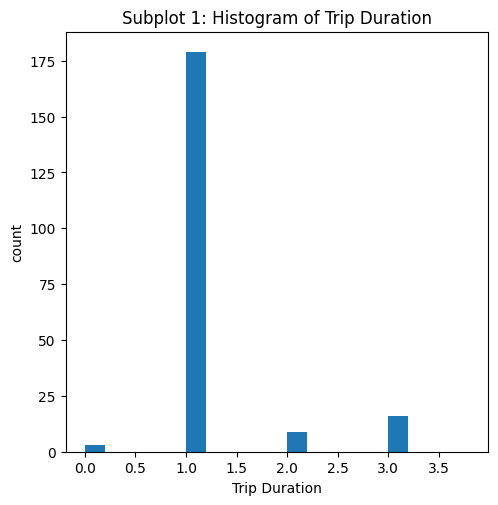

In [28]:
fig = plt.figure(figsize=(12,12))

# Create subplot 1
ax1 = fig.add_subplot(221) # Grid of 2x2, this is suplot 1
ax1.set_xlabel('Trip Duration')
ax1.set_ylabel('count')
ax1.set_title('Subplot 1: Histogram of Trip Duration')

ax1 = plt.hist(df.trip_duration_seconds, bins=np.arange(0,4,0.2))

In [30]:
df['pickup_weekday'].head(5)

0    2
1    0
2    5
3    0
4    6
Name: pickup_weekday, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [32]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df['pickup_weekday'] = df['pickup_weekday'].map(days)

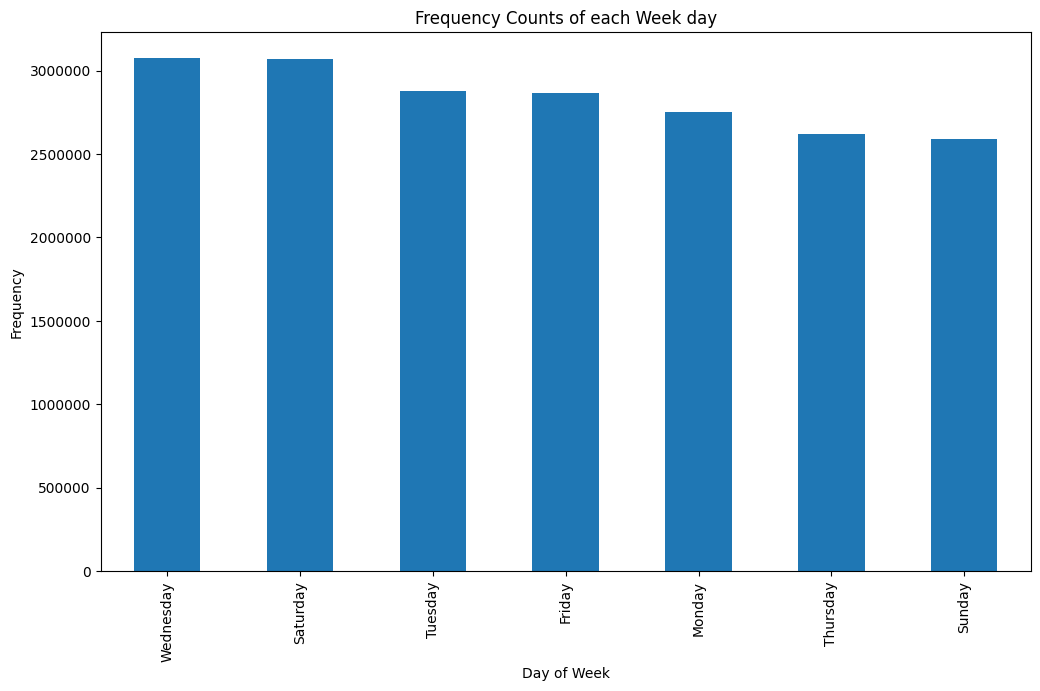

Wednesday    3076240
Saturday     3069166
Tuesday      2876967
Friday       2863244
Monday       2749477
Thursday     2620450
Sunday       2592132
Name: pickup_weekday, dtype: int64


In [33]:
plt.ticklabel_format(style = 'plain')
'''
ax = df['pickup_weekday'].value_counts().rename(index={1:"Credit card", 2:"Cash", 3:"No charge", 4:"Dispute"}).plot(kind='bar',
                                    figsize=(12,7),
                                    title="Frequency Counts of each Week day")
'''
ax = df['pickup_weekday'].value_counts().plot(kind='bar',
                                              figsize=(12,7), title="Frequency Counts of each Week day")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Frequency")

plt.show()
print(df['pickup_weekday'].value_counts())

# EDA

## Categorical Variables

In [34]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

## Continous variables

In [34]:
numeric_df = df[['trip_miles', 'base_passenger_fare', 'tolls','bcf', 'sales_tax',  'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay']]
numeric_df.columns

Index(['trip_miles', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay'],
      dtype='object')

In [35]:
type(numeric_df), numeric_df.head(5), len(numeric_df.columns)

(pandas.core.frame.DataFrame,
    trip_miles  base_passenger_fare  tolls   bcf  sales_tax  \
 0        2.28                11.59   0.00  0.35       1.03   
 1        6.80                46.36   0.00  1.47       4.34   
 2       25.53                80.97   6.55  2.63       7.77   
 3        3.08                16.93   0.00  0.51       1.50   
 4        1.90                28.93   0.00  0.87       2.57   
 
    congestion_surcharge  airport_fee  tips  driver_pay  
 0                  0.00          0.0   0.0        9.23  
 1                  0.00          2.5   0.0       37.96  
 2                  0.00          0.0   0.0       79.67  
 3                  0.00          0.0   0.0       12.64  
 4                  2.75          0.0   0.0       16.62  ,
 9)

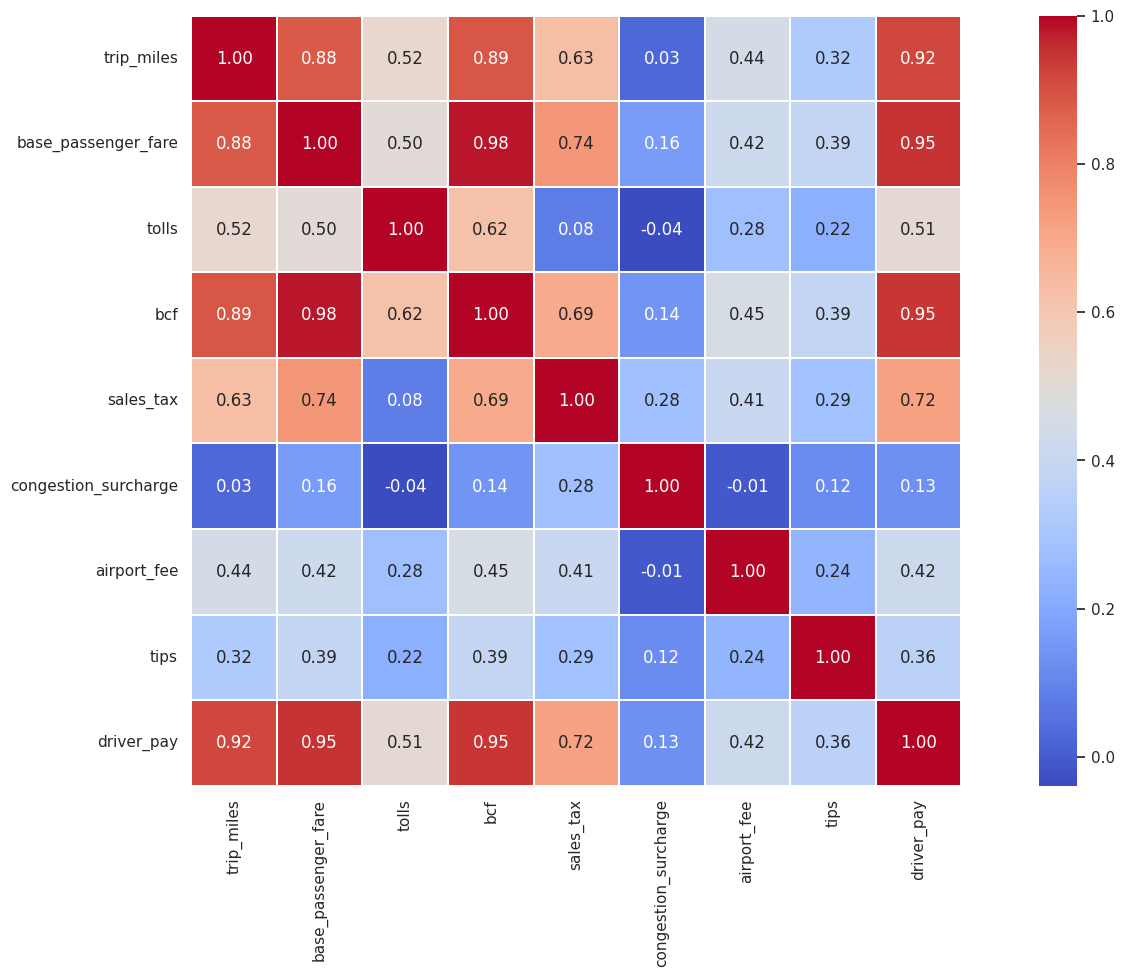

In [36]:
import seaborn as sns

fig = plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(numeric_df.corr(), cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 12}, yticklabels=numeric_df.columns, xticklabels=numeric_df.columns, cmap = 'coolwarm',lw = .1)
plt.show()

## trying AutoViz

In [56]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: param
    Found existing installation: param 2.1.0
    Uninstalling param-2.1.0:
      Successfully uninstalled param-2.1.0
  Attempting uninstall: numpy
    Found existi

In [55]:
from autoviz.AutoViz_Class import AutoViz_Class

# write improved, cleaning data set to csv
# df.to_csv("/content/drive/MyDrive/Datasets/yellow_tripdata_2018-09_improved.csv")

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz(results)


ModuleNotFoundError: No module named 'autoviz'